In [123]:
from fenics import *
import matplotlib.pyplot as plt
from mshr import *
import numpy as np

# Tercer Parcial Modelización y Simulación II
## Javeriana Cali
## Matemáticas Aplicadas
### 2023-1 

**Fecha máxima de entrega**: 26 de mayo de 2023 11:59 pm


1. Usando el método de las caracteristicas resuelva la ecuación 

$$u_t-x^2u_x=0\, \, x\in R \text{ y } t>0$$
$$u(x,0)=x+1,\ \ \ x\in R$$ 
Dibuje la solución en el espacio $(x,t)$

R/ Creamos el sistema de ecuaciones:
$$\begin{cases}
\frac{du}{dt} = x'(t)u_x + u_t = 0\\
\frac{dx}{dt} = -x^2, \quad x(0) = \xi_0
\end{cases}$$

$$
\frac{dx}{dt} = -x^2\\
\frac{1}{x^2} \, dx = - 1 \, dt\\
\int \frac{1}{x^2} \, dx = \int - 1 \, dt\\
-\frac{1}{x} + C_1 = -t + C_2\\
-\frac{1}{x} = -t + C_2 - C_1\\
\frac{1}{x} = t - C_2 + C_1\\
x = \frac{1}{t - C_2 + C_1}\\
x(t) = \frac{1}{t - K}, \quad K = C_2 - C_1
$$
Aplicamos $x(0) = \xi_0$
$$ 
x(0) = -\frac{1}{K} = \xi_0 \\
\xi_0 = - \frac{1}{K}\\
$$
Finalmente:
$$ u(x(0), 0) = u(\xi_0, 0) = u_0(\xi_0) = - \frac{1}{K} + 1 = \frac{K-1}{K} $$

# Ecuación del calor
2. Sea la siguiente ecuación del calor en 2D



$$u_{t} = \nabla^2u+f(x,y)=(u_{xx} + u_{yy})+f(x,y,t),$$
con condición
$$u(x,y,0) = \sin(2\pi x+2\pi y),$$
$$u(0,y,t) =sin(2\pi y)+1−\cos(2\pi t)\,\,0\leq y\leq 1,t\geq 0$$
$$u(1,y,t)=sin(\pi(2y+2))+1−\cos(2\pi t)\,\,0\leq y\leq 1,t\geq 0$$
$$u(x,0,t) =sin(2\pi y)+1−\cos(2\pi t)\,\,0\leq x\leq 1,t\geq 0$$
$$u(x,1,t)= sin(\pi(2y+2))+1−\cos(2\pi t)\,\,0\leq x\leq 1,t\geq 0$$
$\Omega=[0,1]\times[0,1]$.
y
$$f(x,y,t)=\displaystyle 2 \pi \sin{\left(2 \pi t \right)} + 8 \pi^{2} \sin{\left(\pi \left(2 x + 2 y\right) \right)},$$

El método $\theta$ para resolver la ecuación del calor es

$$u_t-\nabla^2 u=f\,\, en\, \Omega\times(0,T)$$

$$u=u_0 \,\, en\, \partial\Omega\times{\{0\}}$$

$$\frac{1}{\Delta t}\Big(u^{n+1}-u^n\Big)+\theta\Delta u^{n+1}-(1-\theta)\Delta u^n=\theta f(t_{n+1})+(1-\theta)f(t_{n})$$

Haga un análisis de convergencia numérica, para $\theta=0,1/2,2/3,1$, para ello encuentre el error $||\cdot||_2$ de diferentes mallas y en el mismo tiempo final $T=1$.
Luego encuentre el orden de convergencia numérica. Para ello recuerde que $$E=||u-u_h||_2\leq Ch^p$$ donde $p$ es el orden de convergencia numérica.
Note que la solución analítica del problema es  

$$\sin(2\pi x+2\pi y)−\cos(2\pi t)+1$$

R/ Primero debemos encontrar la formula variacional del problema:

$$ u_t - \Delta u = f \\
\frac{u^{n+1} - u^n}{dt} - \theta \Delta u^{n+1} - (1- \theta)\Delta u^n = \theta f(t_{n+1})+(1-\theta)f(t_{n})\\
u^{n+1} - u^n - dt \theta \Delta u^{n+1} - dt (1-\theta) \Delta u^n = dt \theta f(t_{n+1}) + dt(1-\theta)f(t_{n})\\
\int_{\Omega} v u^{n+1} - dt \theta v\Delta u^{n+1} \, dx = \int_{\Omega} v u^n + dt(1-\theta) \Delta u^n v \, dx + dt \int_{\Omega} (\theta f(t_{n+1})+(1-\theta)f(t_{n}))v \, dx 
$$
Aplicando Teorema de Green en los laplacianos, la integral de superficie es 0 pues la funcion test se anula en la frontera, por la tanto la formula variacional queda:
$$ \int_{\Omega} u^{n+1}v + dt \theta (\nabla u^{n+1} \cdot \nabla v) \, dx = \int_{\Omega} (u^n + dt \theta f(t_{n+1}) + dt(1-\theta)f(t_n))v - dt(1-\theta)(\nabla u^n \cdot \nabla v) \, dx $$


In [124]:
# Define mesh and function space
domain = Rectangle(Point(0, 0), Point(1, 1))
mesh = generate_mesh(domain, 100)
V = FunctionSpace(mesh, 'Lagrange', 1)

#Discretization
T = 1.0 # final time
num_steps = 100 # number of time steps
dt = T / num_steps # time step size

# Define functions for boundary conditions
t = 0
u_D_top = Expression('sin(2*pi*(x[0]+1)) + 1 - cos(2*pi*t)',degree=2, t=t) #y=1
u_D_bottom = Expression('sin(2*pi*x[0]) + 1 - cos(2*pi*t)',degree=2, t=t) #y=0
u_D_left = Expression('sin(2*pi*x[1]) + 1 - cos(2*pi*t)',degree=2, t=t) #x=0
u_D_right = Expression('sin(2*pi*(x[1]+1)) + 1 - cos(2*pi*t)',degree=2, t=t) # x=1

# Define the boundary condition
def boundary_top(x, on_boundary):
    return on_boundary and near(x[1], 1.0)
def boundary_bottom(x, on_boundary):
    return on_boundary and near(x[1], 0.0)
def boundary_left(x, on_boundary):
    return on_boundary and near(x[0], 0.0)
def boundary_right(x, on_boundary):
    return on_boundary and near(x[0], 1.0)

bc_top = DirichletBC(V, u_D_top, boundary_top)
bc_bottom = DirichletBC(V, u_D_bottom, boundary_bottom)
bc_left = DirichletBC(V, u_D_left, boundary_left)
bc_right = DirichletBC(V, u_D_right, boundary_right)

bc = [bc_top, bc_bottom, bc_left, bc_right]

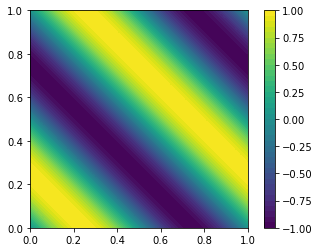

In [125]:
# The initial condition t=0. u(x,y,0) = sin(2*pi*(x + y))
initial_condition = Expression("sin(2*pi*(x[0] + x[1]))",degree=2)
u_k_old = interpolate(initial_condition,V)
p = plot(u_k_old)
plt.colorbar(p)

In [126]:
# Define the variational problem
u = TrialFunction(V)
v = TestFunction(V)
theta = 1
# f(x,y,t)= 2*pi*sin(2*pi*t) + 8*pi^2 * sin(2*pi*(x + y))
exp = Expression('2*pi*sin(2*pi*t) + 8*pi*pi * sin(2*pi*(x[0] + x[1]))',degree=2, t=t)
f_old = exp
f = exp
a = (u*v + dt*theta*inner(nabla_grad(u), nabla_grad(v)))*dx
L = ((u_k_old + dt*theta*f + dt*(1-theta)*f_old)*v - dt*(1-theta)*inner(nabla_grad(u_k_old), nabla_grad(v)))*dx

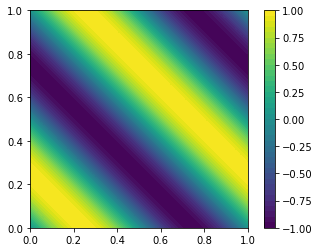

In [127]:
u_exact = Expression('sin(2*pi*(x[0] + x[1])) - cos(2*pi*t) + 1',degree=2, t=t)
u_e = interpolate(u_exact, V)
p = plot(u_e)
plt.colorbar(p)

In [128]:
# Error at t=0
error_L2 = errornorm(interpolate(initial_condition,V), interpolate(u_exact, V))
print(error_L2)

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
5.177645470662003e-17


Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

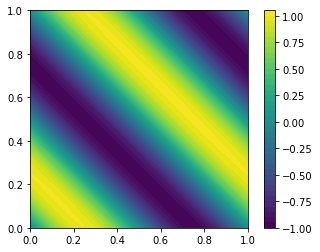

In [129]:
fid = File("parcial3/heat/solution.pvd")
# Time-stepping
u = Function(V)
t = 0
while t <= T:
    # Update time
    t += dt
    # Update time for boundary conditions
    u_D_top.t = t
    u_D_bottom.t = t
    u_D_left.t = t
    u_D_right.t = t
    # Update time for the fs
    f_old.t = t - dt
    f.t = t
    # Update time for exact solution
    u_e.t = t 
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    p = plot(u)
    # Update previous solution
    u_k_old.assign(u)
    fid << u, t
plt.colorbar(p)

$$ E = \sqrt{\int_{\Omega} (u - u_h)^ 2 \, dx} $$

In [130]:
# Error at final time
e = u - u_e
assemble(e**2*dx(mesh))

5.3183088628190536e-05

Debido a que para $\theta < 0.5$ el metodo numerico se destabliza y genera errores inmensos, el ananlisis se hara para $\theta \in [0.5, 1]$

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

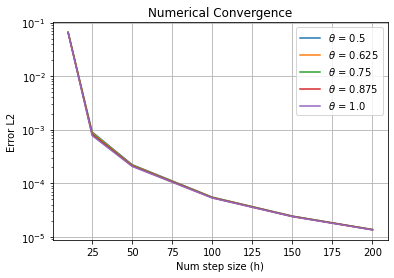

In [145]:
theta_values = np.linspace(0.5, 1, 5)
h_values = [10, 25, 50, 100, 150, 200]
err = []
for theta in theta_values:
    errors = []
    for h in h_values:
        T = 1.0
        dt = T/h
        # Define functions for boundary conditions
        t = 0
        u_D_top = Expression('sin(2*pi*(x[0]+1)) + 1 - cos(2*pi*t)',degree=2, t=t) #y=1
        u_D_bottom = Expression('sin(2*pi*x[0]) + 1 - cos(2*pi*t)',degree=2, t=t) #y=0
        u_D_left = Expression('sin(2*pi*x[1]) + 1 - cos(2*pi*t)',degree=2, t=t) #x=0
        u_D_right = Expression('sin(2*pi*(x[1]+1)) + 1 - cos(2*pi*t)',degree=2, t=t) # x=1
        # Define the boundary condition
        bc_top = DirichletBC(V, u_D_top, boundary_top)
        bc_bottom = DirichletBC(V, u_D_bottom, boundary_bottom)
        bc_left = DirichletBC(V, u_D_left, boundary_left)
        bc_right = DirichletBC(V, u_D_right, boundary_right)
        bc = [bc_top, bc_bottom, bc_left, bc_right]
        # Initial condition
        initial_condition = Expression("sin(2*pi*(x[0] + x[1]))",degree=2)
        u_k_old = interpolate(initial_condition,V)
        u_exact = Expression('sin(2*pi*(x[0] + x[1])) - cos(2*pi*t) + 1',degree=2, t=t)
        u_e = interpolate(u_exact, V)
        # Define the variational problem
        u = TrialFunction(V)
        v = TestFunction(V)
        # f(x,y,t)= 2*pi*sin(2*pi*t) + 8*pi^2 * sin(2*pi*(x + y))
        exp = Expression('2*pi*sin(2*pi*t) + 8*pi*pi * sin(2*pi*(x[0] + x[1]))',degree=2, t=t)
        f_old = exp
        f = exp
        a = (u*v + dt*theta*inner(nabla_grad(u), nabla_grad(v)))*dx
        L = ((u_k_old + dt*theta*f + dt*(1-theta)*f_old)*v - dt*(1-theta)*inner(nabla_grad(u_k_old), nabla_grad(v)))*dx
        # Time-stepping
        u = Function(V)
        t = 0
        while t <= T:
            # Update time
            t += dt
            # Update time for boundary conditions
            u_D_top.t = t
            u_D_bottom.t = t
            u_D_left.t = t
            u_D_right.t = t
            # Update time for the fs
            f_old.t = t - dt
            f.t = t
            # Update time for exact solution
            u_e.t = t 
            # Solve variational problem at current time step
            solve(a == L, u, bc)
            # Update previous solution
            u_k_old.assign(u)
        e = u - u_e
        errors.append(assemble(e**2*dx(mesh)))
    err.append(errors)
    plt.plot(h_values, errors, label=f'$\\theta$ = {round(theta, 3)}')
plt.xlabel('Num step size (h)')
plt.ylabel('Error L2')
plt.title('Numerical Convergence')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

Para encontrar el orden de convergencia numérica, utlizaremos el metodo de los logaritmos:
$$
\frac{E_1}{E_2} = \Big( \frac{h_1}{h_2} \Big)^p\\
\log_2{\Big( \frac{E_1}{E_2} \Big)} = p \log_2{\Big( \frac{h_1}{h_2} \Big)} \\
p = \frac{\log_2{\Big( \frac{E_1}{E_2} \Big)}}{\log_2{\Big( \frac{h_1}{h_2} \Big)}}
$$

In [149]:
error_ratios = np.array(errors[:-1]) / np.array(errors[1:])
h_ratios = np.array(h_values[:-1]) / np.array(h_values[1:])
p = np.log2(error_ratios) / np.log2(h_ratios)
print("Numerical convergence order::", np.mean(p))

Numerical convergence order:: -2.5288521250434863


# Ecuación de onda

Sea la ecuación de onda en 2D

$$u_{tt} = \nabla^2u + f(x,y,t),$$
con
$$f(x,y,t)=−4\pi^2x^2\cos(2\pi xy)-4\pi^2y^2 \cos(2\pi x y)-4\pi^2\sin(2\pi t)$$

$$u(x,y,0) = \displaystyle 1 - \cos{\left(2 \pi x y \right)},$$
$$u_t(x,y,0) =2\pi,$$

y condiciones de frontera
$u|_{\partial \Omega}=\sin(2\pi t)+1-\cos(2\pi xy)$ con $\Omega=[0,1]\times[0,1]$.

El problema numérico es
$$u_{tt}-\Delta u=f\,\, in\,\Omega\times(0,T]$$

$$u=0\,\, on\,\partial\Omega\times(0,T]$$
$$u(\cdot,t)=u_0\,\, in\,\Omega$$
$$u_t(\cdot,t)=g\,\, in\,\Omega$$

$$\frac{1}{(\Delta t)^2} \Big(u^{n+1}-2u^n+u^{n-1}\Big)-\frac{1}{2}\Delta(u^{n+1}+u^{n-1})= f(t^n)$$

with $u¹=u^0+u_t\Delta t$.

La solución analítica del problema es 

$$u(x,y,t)=\sin(2\pi t)+1-\cos(2\pi xy)$$

Haga un análisis de convergencia numérica, para ello encuentre el error $||\cdot||_2$ de diferentes mallas y en el mismo tiempo final $T=1$. Luego encuentre el orden de convergencia numérica. Para ello recuerde que $$E=||u-u_h||_2\leq Ch^p$$ donde $p$ es el orden de convergencia numérica.


Primero debemos calcular la formula variacional:
$$ 
u_{tt} = \Delta u + f\\
\frac{u^{k+2} - 2u^{k+1} + u^k}{dt^2} = \frac{1}{2} \Delta (u^{k+2} + u^k) + f(t_n)\\
\int_{\Omega} vu^{k+2} - 2vu^{k+1} + vu^k \, dx = dt^2 \int_{\Omega} \frac{1}{2} \Delta(u^{k+2} + u^k)v + vf(t_n) \, dx
$$
Aplicando Teorema de Green en el laplaciano obtenemos que:
$$
\int_{\Omega} \Delta(u^{k+2} + u^k)v \, dx = - \int_{\Omega} \nabla(u^{k+2} + u^k)\cdot \nabla v \, dx\\
\int_{\Omega} \Delta(u^{k+2} + u^k)v \, dx = - \int_{\Omega} \nabla u^{k+2} \cdot \nabla v + \nabla u^k \cdot \nabla v \, dx
$$
Entonces:
$$
\int_{\Omega} vu^{k+2} - 2vu^{k+1} + vu^k \, dx = dt^2 \int_{\Omega} vf(t_n) - \frac{1}{2}(\nabla u^{k+2} \cdot \nabla v + \nabla u^k \cdot \nabla v) \, dx\\
\int_{\Omega} vu^{k+2} + \frac{dt^2}{2}(\nabla u^{k+2} \cdot \nabla v) \, dx = \int_{\Omega} (dt^2 f(t_n) + 2u^{k+1} - u^k)v - \frac{dt^2}{2}(\nabla u^k \cdot \nabla v) \, dx
$$

In [159]:
# Define mesh and function space
domain = Rectangle(Point(0, 0), Point(1, 1))
mesh = generate_mesh(domain, 100)

#Discretization
T = 1 # final time
num_steps = 100 # number of time steps
dt = T / num_steps # time step size

V = FunctionSpace(mesh, 'Lagrange', 1)

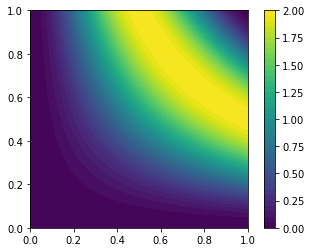

In [151]:
fid = File("parcial3/wave/solution.pvd")

# Define the boundary condition
t = 0
u_D = Expression("sin(2*pi*t) + 1 - cos(2*pi*x[0]*x[1])",degree=2, t=t)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)

# The initial condition t=0. u(x,y,0) = 1 - cos(2*pi*x*y)
initial_condition = Expression("1 - cos(2*pi*x[0]*x[1])",degree=2)
u_k = interpolate(initial_condition,V)
p = plot(u_k)
plt.colorbar(p)

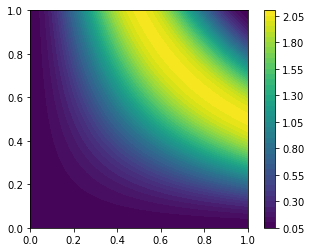

In [152]:
# u^1 = u^0 + g(x,y) * dt
u_k1 = Expression("1 - cos(2*pi*x[0]*x[1]) + 2*pi*dt",degree=2, dt=dt)
u_k1 = interpolate(u_k1,V)
p = plot(u_k1)
plt.colorbar(p)

In [153]:
# Define varational problem
u_k2 = TrialFunction(V)
v = TestFunction(V)
f = Expression("-4*pi*pi*cos(2*pi*x[0]*x[1])*(x[0]*x[0] + x[1]*x[1]) - 4*pi*pi*sin(2*pi*t)",degree=2, t=t)

a = (v*u_k2 + (dt*dt/2)*inner(nabla_grad(u_k2),nabla_grad(v)))*dx
L = ((dt*dt*f + 2*u_k1 - u_k)*v - (dt*dt/2)*inner(nabla_grad(u_k),nabla_grad(v)))*dx

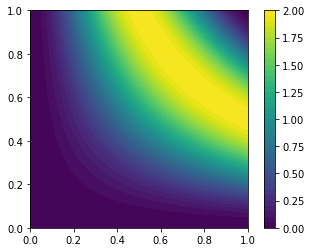

In [154]:
u_exact = Expression('sin(2*pi*t) + 1 - cos(2*pi*x[0]*x[1])',degree=2, t=t)
u_e = interpolate(u_exact, V)
p = plot(u_e)
plt.colorbar(p)

In [155]:
# Error at t=0
error_L2 = errornorm(interpolate(initial_condition,V), interpolate(u_exact, V))
print(error_L2)

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
0.0


Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

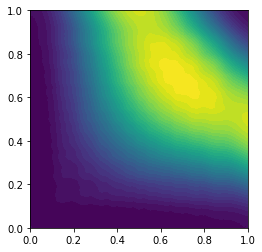

In [156]:
# Time-stepping
u = Function(V)
t = 0
while t <= T:
    # Update time
    t += dt
    f.t = t
    u_D.t = t
    u_e.t = t 
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    plot(u)    
    # Update previous solution
    u_k.assign(u_k1)
    u_k1.assign(u)
    # Save solution through time to visualize in paraview
    fid << u, t

In [157]:
# Error at final time
e = u - u_e
assemble(e**2*dx(mesh))

0.01590409534591551

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

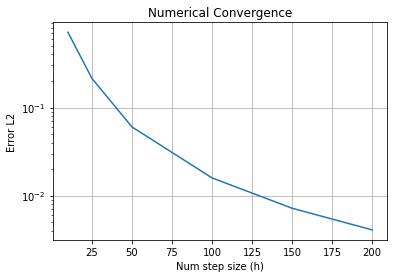

In [162]:
h_values = [10, 25, 50, 100, 150, 200]
errors = []
for h in h_values:
    T = 1.0
    dt = T/h
    # Define functions for boundary conditions
    t = 0
    u_D = Expression("sin(2*pi*t) + 1 - cos(2*pi*x[0]*x[1])",degree=2, t=t)
    bc = DirichletBC(V, u_D, boundary)
    # The initial condition t=0. u(x,y,0) = 1 - cos(2*pi*x*y)
    initial_condition = Expression("1 - cos(2*pi*x[0]*x[1])",degree=2)
    u_k = interpolate(initial_condition,V)
    # u^1 = u^0 + g(x,y) * dt
    u_k1 = Expression("1 - cos(2*pi*x[0]*x[1]) + 2*pi*dt",degree=2, dt=dt)
    u_k1 = interpolate(u_k1,V)
    # Exact solution for error calculation
    u_exact = Expression('sin(2*pi*t) + 1 - cos(2*pi*x[0]*x[1])',degree=2, t=t)
    u_e = interpolate(u_exact, V)
    # Define the variational problem
    u_k2 = TrialFunction(V)
    v = TestFunction(V)
    f = Expression("-4*pi*pi*cos(2*pi*x[0]*x[1])*(x[0]*x[0] + x[1]*x[1]) - 4*pi*pi*sin(2*pi*t)",degree=2, t=t)
    a = (v*u_k2 + (dt*dt/2)*inner(nabla_grad(u_k2),nabla_grad(v)))*dx
    L = ((dt*dt*f + 2*u_k1 - u_k)*v - (dt*dt/2)*inner(nabla_grad(u_k),nabla_grad(v)))*dx
    # Time-stepping
    u = Function(V)
    t = 0
    while t <= T:
        # Update time
        t += dt
        f.t = t
        u_D.t = t
        u_e.t = t 
        # Solve variational problem at current time step
        solve(a == L, u, bc) 
        # Update previous solution
        u_k.assign(u_k1)
        u_k1.assign(u)
    e = u - u_e
    errors.append(assemble(e**2*dx(mesh)))
plt.plot(h_values, errors)
plt.xlabel('Num step size (h)')
plt.ylabel('Error L2')
plt.title('Numerical Convergence')
plt.yscale('log')
plt.grid(True)
plt.show()

In [163]:
error_ratios = np.array(errors[:-1]) / np.array(errors[1:])
h_ratios = np.array(h_values[:-1]) / np.array(h_values[1:])
p = np.log2(error_ratios) / np.log2(h_ratios)
print("Numerical convergence order::", np.mean(p))

Numerical convergence order:: -1.7976596093794641
